In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as LR
import re
from sklearn.linear_model import Ridge
from functools import reduce
import matplotlib.pyplot as plt

In [2]:
trade_df = pd.read_csv('first_round_train_market_data.csv')
fundamental_df  = pd.read_csv('first_round_train_fundamental_data.csv')
rtn_df = pd.read_csv('first_round_train_return_data.csv')

### 处理数据字段 <br>

In [3]:
# 分切stock & date
fundamental_df.loc[:,'stk'] = fundamental_df.date_time.apply(lambda x:x.split('d',1)[0])
fundamental_df.loc[:,'date'] = fundamental_df.date_time.apply(lambda x:int(x.split('d',1)[1]))

rtn_df.loc[:,'stk'] = rtn_df.date_time.apply(lambda x:x.split('d',1)[0])
rtn_df.loc[:,'date'] = rtn_df.date_time.apply(lambda x:int(x.split('d',1)[1]))

In [4]:
# 分切stock & date & time
trade_df.loc[:,'stk'] =  trade_df.date_time.apply(lambda x:x.split('d',1)[0])
trade_df.loc[:,'date_'] =trade_df.date_time.apply(lambda x:x.split('d',1)[1])
trade_df.loc[:,'date'] =trade_df.date_.apply(lambda x:int(x.split('p',1)[0]))
trade_df.loc[:,'time'] = trade_df.date_.apply(lambda x:int(x.split('p',1)[1]))

In [5]:
trade_df

,date_time,open,close,high,low,volume,money,stk,date_,date,time
0,s0d1p1,25.0164,24.9557,25.1378,24.9436,642243.0,1.610060e+07,s0,1p1,1,1
1,s1d1p1,16.3256,16.3499,16.4106,16.3256,15552.0,2.540301e+05,s1,1p1,1,1
2,s2d1p1,9.2006,9.1763,9.2006,9.1521,396647.0,3.638304e+06,s2,1p1,1,1
3,s3d1p1,9.1521,9.2006,9.2006,9.1521,317044.0,2.907092e+06,s3,1p1,1,1
4,s4d1p1,5.1829,5.1222,5.1829,5.1101,294784.0,1.514496e+06,s4,1p1,1,1
5,s5d1p1,16.0222,15.7430,16.0222,15.5973,216695.0,3.417905e+06,s5,1p1,1,1
6,s6d1p1,3.8963,3.7871,3.9206,3.7871,9082650.0,3.517464e+07,s6,1p1,1,1
7,s7d1p1,23.3050,23.1714,23.3050,23.1472,188894.0,4.382898e+06,s7,1p1,1,1
8,s8d1p1,9.8803,9.8196,9.8803,9.8196,867751.0,8.556113e+06,s8,1p1,1,1
9,s9d1p1,2.3790,2.3790,2.3912,2.3790,3009534.0,7.181654e+06,s9,1p1,1,1


In [6]:
fundamental_df

,date_time,turnoverRatio,transactionAmount,pe_ttm,pe,pb,ps,pcf,stk,date
0,s0d1,3.6794,17229.0,34.4425,32.3029,4.9425,3.8180,-578.7700,s0,1
1,s1d1,2.5150,3706.0,28.9934,27.2726,5.0552,3.0484,23.8260,s1,1
2,s2d1,1.2858,5136.0,42.9352,41.9279,4.8083,4.1392,-58.2185,s2,1
3,s3d1,2.2007,3280.0,15.2245,13.8032,2.1904,0.6691,61.0491,s3,1
4,s4d1,0.8627,5291.0,-369.9850,-433.1736,3.0714,2.9370,-25.2279,s4,1
5,s5d1,1.4799,3602.0,79.2510,98.2418,10.4734,16.9784,-220.7509,s5,1
6,s6d1,3.1936,50013.0,230.3588,-84.8581,1.6212,0.6232,9.5680,s6,1
7,s7d1,1.1519,5420.0,28.0377,27.6825,7.9503,10.4892,-236.7706,s7,1
8,s8d1,1.9779,5518.0,33.4061,29.6512,11.1719,4.8248,58.7035,s8,1
9,s9d1,4.9000,18490.0,16.5951,14.7185,3.0420,0.7481,-46.2671,s9,1


In [7]:
rtn_df

,date_time,return,stk,date
0,s0d1,-0.026877,s0,1
1,s1d1,-0.052674,s1,1
2,s2d1,-0.002691,s2,1
3,s3d1,-0.018515,s3,1
4,s4d1,-0.019184,s4,1
5,s5d1,0.024430,s5,1
6,s6d1,0.018743,s6,1
7,s7d1,0.014376,s7,1
8,s8d1,-0.011925,s8,1
9,s9d1,-0.020020,s9,1


### 处理日内特征值 <br>
#### 扩展成 日内分钟收益波动率、日级别短期动量等特征值 <br>

In [8]:
# 日内分钟高低差率
trade_df.loc[:,'low_high'] = (trade_df['high'] / trade_df['low'])-1
# 日内分钟收益率
trade_df.loc[:,'chg_Min'] = (trade_df['close'] / trade_df['open'])-1

In [9]:
# 日内总变动
day_chg = trade_df.groupby(['stk','date']).chg_Min.sum().reset_index()
day_chg.columns = ['stk','date','chg']
print(day_chg)

# 高低变动程度
Vol_Inday = trade_df.groupby(['stk','date']).low_high.std().reset_index()
Vol_Inday.columns = ['stk','date','Vol_Inday']
print(Vol_Inday)

# 日内收益率偏度    
Skew_Inday = trade_df.groupby(['stk','date']).chg_Min.skew().reset_index()
Skew_Inday.columns = ['stk','date','Skew_Inday']
print(Skew_Inday)

# 日内交易量变动程度
AmtStd_Inday = trade_df.groupby(['stk','date']).money.std().reset_index()
AmtStd_Inday.columns = ['stk','date','AmtStd_Inday']
print(AmtStd_Inday)

      stk  date       chg
0      s0     1 -0.027866
1      s0     2 -0.036239
2      s0     3  0.005240
3      s0     4  0.020273
4      s0     5  0.075844
5      s0     6 -0.003207
6      s0     7 -0.014451
7      s0     8 -0.013524
8      s0     9  0.026147
9      s0    10 -0.002659
10     s0    11 -0.009795
11     s0    12  0.011388
12     s0    13  0.038222
13     s0    14  0.036735
14     s0    15  0.007457
15     s0    16  0.001075
16     s0    17  0.000806
17     s0    18 -0.008106
18     s0    19  0.019069
19     s0    20 -0.014843
20     s0    21  0.042756
21     s0    22 -0.021333
22     s0    23 -0.055643
23     s0    24  0.004648
24     s0    25 -0.002025
25     s0    26 -0.026257
26     s0    27 -0.028803
27     s0    28  0.002070
28     s0    29  0.000230
29     s0    30  0.007340
...    ..   ...       ...
53970  s9   971 -0.022996
53971  s9   972  0.004485
53972  s9   973  0.010704
53973  s9   974 -0.006114
53974  s9   975 -0.034703
53975  s9   976 -0.008691
53976  s9   

In [10]:
trade_df

,date_time,open,close,high,low,volume,money,stk,date_,date,time,low_high,chg_Min
0,s0d1p1,25.0164,24.9557,25.1378,24.9436,642243.0,1.610060e+07,s0,1p1,1,1,0.007786,-0.002426
1,s1d1p1,16.3256,16.3499,16.4106,16.3256,15552.0,2.540301e+05,s1,1p1,1,1,0.005207,0.001488
2,s2d1p1,9.2006,9.1763,9.2006,9.1521,396647.0,3.638304e+06,s2,1p1,1,1,0.005299,-0.002641
3,s3d1p1,9.1521,9.2006,9.2006,9.1521,317044.0,2.907092e+06,s3,1p1,1,1,0.005299,0.005299
4,s4d1p1,5.1829,5.1222,5.1829,5.1101,294784.0,1.514496e+06,s4,1p1,1,1,0.014246,-0.011712
5,s5d1p1,16.0222,15.7430,16.0222,15.5973,216695.0,3.417905e+06,s5,1p1,1,1,0.027242,-0.017426
6,s6d1p1,3.8963,3.7871,3.9206,3.7871,9082650.0,3.517464e+07,s6,1p1,1,1,0.035251,-0.028027
7,s7d1p1,23.3050,23.1714,23.3050,23.1472,188894.0,4.382898e+06,s7,1p1,1,1,0.006817,-0.005733
8,s8d1p1,9.8803,9.8196,9.8803,9.8196,867751.0,8.556113e+06,s8,1p1,1,1,0.006182,-0.006144
9,s9d1p1,2.3790,2.3790,2.3912,2.3790,3009534.0,7.181654e+06,s9,1p1,1,1,0.005128,0.000000


### 处理日间因子 <br>
#### Momentum、reverse、ROE、PB、PE、Vol、Vol_Inday、Skew_Inday、AmtStd_Inday、turnoverRatio<br>

In [11]:
# 获得全部stock的list
stk_ls = np.unique(day_chg.stk)
ls = []
for code in stk_ls:
    stk_series =  day_chg[day_chg.stk==code].copy()
    stk_series.chg = np.log(stk_series.chg+1)
    # 趋势策略
    stk_series.loc[:,'Trand'] = stk_series.chg.rolling(252).sum()
    # 逆转策略
    stk_series.loc[:,'Reverse'] = stk_series.chg.rolling(21).sum()
    # 动量策略
    stk_series.loc[:,'Momentum'] = stk_series.Trand - stk_series.Reverse
    ls.append(stk_series[['stk','date','Momentum','Reverse']])
    pass
df_M = pd.concat(ls, ignore_index=True)

In [12]:
fundamental_df.loc[:,'ROE'] = fundamental_df.pb / fundamental_df.pe_ttm

In [13]:
ls_PETS = []
for code in stk_ls:
    
    stk_series_fundamental =  fundamental_df.loc[(fundamental_df.stk==code),('stk','date','pe_ttm')].copy()
    # print(stk_series_fundamental)
    # pe_ttm标准化
    stk_series_fundamental.loc[:,'ts_PE'] = (stk_series_fundamental.pe_ttm - stk_series_fundamental.pe_ttm.rolling(125).mean())\
    /stk_series_fundamental.pe_ttm.rolling(125).std()
    ls_PETS.append(stk_series_fundamental[['stk','date','ts_PE']])
    pass
df_TSPE = pd.concat(ls_PETS, ignore_index=True)

### 合并因子DataFrame <br>

In [14]:
# 合并多个数据集
ls = [Vol_Inday, Skew_Inday, AmtStd_Inday, df_M, df_TSPE, fundamental_df]
# 完善为单个数据集
df = reduce(lambda left,right:pd.merge(left, right, on=['stk','date']),ls)

In [15]:
print(df)

      stk  date  Vol_Inday  Skew_Inday  AmtStd_Inday  Momentum   Reverse  \
0      s0     1   0.001877    0.226399  6.994818e+06       NaN       NaN   
1      s0     2   0.001947   -0.520943  4.393546e+06       NaN       NaN   
2      s0     3   0.001599    0.533611  3.596407e+06       NaN       NaN   
3      s0     4   0.001983    0.770534  6.721355e+06       NaN       NaN   
4      s0     5   0.006538    2.140414  8.153666e+07       NaN       NaN   
5      s0     6   0.003542   -0.684649  2.145613e+07       NaN       NaN   
6      s0     7   0.002200    0.335566  1.103744e+07       NaN       NaN   
7      s0     8   0.003017    0.585898  1.755186e+07       NaN       NaN   
8      s0     9   0.003026    1.037243  9.523211e+06       NaN       NaN   
9      s0    10   0.002031   -0.087723  8.031257e+06       NaN       NaN   
10     s0    11   0.001871   -0.357685  5.856972e+06       NaN       NaN   
11     s0    12   0.001995    0.647230  1.434894e+07       NaN       NaN   
12     s0   

In [16]:
df.AmtStd_Inday = df.AmtStd_Inday/df.transactionAmount

In [17]:
print(df)

      stk  date  Vol_Inday  Skew_Inday  AmtStd_Inday  Momentum   Reverse  \
0      s0     1   0.001877    0.226399    405.990957       NaN       NaN   
1      s0     2   0.001947   -0.520943    239.065525       NaN       NaN   
2      s0     3   0.001599    0.533611    262.779976       NaN       NaN   
3      s0     4   0.001983    0.770534    297.576258       NaN       NaN   
4      s0     5   0.006538    2.140414   1249.814711       NaN       NaN   
5      s0     6   0.003542   -0.684649    627.372358       NaN       NaN   
6      s0     7   0.002200    0.335566    464.108922       NaN       NaN   
7      s0     8   0.003017    0.585898    599.059895       NaN       NaN   
8      s0     9   0.003026    1.037243    400.926642       NaN       NaN   
9      s0    10   0.002031   -0.087723    450.510857       NaN       NaN   
10     s0    11   0.001871   -0.357685    393.111723       NaN       NaN   
11     s0    12   0.001995    0.647230    717.088557       NaN       NaN   
12     s0   

In [18]:
df_Factor = df[['stk','date','Vol_Inday','AmtStd_Inday','Momentum','Reverse','ts_PE','turnoverRatio','pe_ttm',\
               'ROE','pb','ps','pcf']].copy()
df_Factor = df_Factor.sort_values(by=['date','stk'])
df_Factor = df_Factor[df_Factor.date>251]

In [19]:
df_Factor

,stk,date,Vol_Inday,AmtStd_Inday,Momentum,Reverse,ts_PE,turnoverRatio,pe_ttm,ROE,pb,ps,pcf
251,s0,252,0.011596,413.678146,0.101121,-0.156647,-0.823442,1.7481,28.7534,0.114564,3.2941,2.8206,264.5692
1251,s1,252,0.005517,451.119236,0.732559,-0.167365,-1.569305,0.7582,34.7940,0.161907,5.6334,3.8686,-111.3557
2251,s10,252,0.008815,370.701647,0.441605,-0.046755,-0.142584,2.6105,27.1001,0.097409,2.6398,2.5905,21.9590
3251,s11,252,0.006117,630.713424,0.387489,-0.067011,-1.270856,0.8246,30.5872,0.214338,6.5560,8.5374,137.0524
4251,s12,252,0.011071,349.241519,0.231170,-0.050817,1.771919,2.6171,22.2504,0.094304,2.0983,0.9908,23.6567
5251,s13,252,0.009118,466.104435,0.695627,-0.043567,-2.116260,1.4064,41.0076,0.286779,11.7601,9.1120,172.3253
6251,s14,252,0.013601,411.563689,0.825754,-0.248076,-0.042424,2.2762,59.3068,0.076934,4.5627,7.0146,-237.0555
7251,s15,252,0.008926,662.287908,0.857682,-0.086522,-0.387144,2.2883,40.3844,0.138338,5.5867,4.9935,1843.4739
8251,s16,252,0.004843,183.903692,0.538210,-0.026979,0.903926,0.4629,44.1848,0.046358,2.0483,2.0710,2654.0830
9251,s17,252,0.009310,370.663445,0.135171,-0.231672,-1.669129,1.8427,454.3006,0.003347,1.5204,1.3908,67.2819


### 对因子值进行Z_score <br>

In [20]:
date_index = df_Factor.date.unique()
ls_score = []
# 按照日期推进
for date in date_index:
    cross_df = df_Factor[df_Factor.date==date].copy()
    # 数据标准化
    for j in range(2,cross_df.shape[1]):
        cross_df.iloc[:,j] = (cross_df.iloc[:,j] - cross_df.iloc[:,j].mean())/cross_df.iloc[:,j].std()
        pass
    ls_score.append(cross_df)
    pass

df_score = pd.concat(ls_score, ignore_index=True)

In [21]:
df_score

,stk,date,Vol_Inday,AmtStd_Inday,Momentum,Reverse,ts_PE,turnoverRatio,pe_ttm,ROE,pb,ps,pcf
0,s0,252,0.945343,-0.348027,-1.244486,-0.848765,-0.286863,-0.185121,-0.208148,0.058655,-0.566511,-0.404073,0.235705
1,s1,252,-1.041953,-0.184903,0.492054,-0.943738,-0.751633,-0.851090,-0.185886,0.542098,0.366642,-0.200350,-0.565890
2,s10,252,0.036233,-0.535269,-0.308111,0.125009,0.137401,0.395071,-0.214241,-0.116518,-0.827513,-0.448803,-0.281619
3,s11,252,-0.845965,0.597558,-0.456935,-0.054487,-0.565660,-0.806419,-0.201390,1.077491,0.734669,0.707228,-0.036203
4,s12,252,0.773888,-0.628767,-0.886835,0.089012,1.330387,0.399511,-0.232114,-0.148228,-1.043518,-0.759772,-0.277999
5,s13,252,0.135263,-0.119615,0.390485,0.153251,-1.092457,-0.415005,-0.162987,1.817212,2.810597,0.818925,0.039011
6,s14,252,1.600790,-0.357240,0.748353,-1.658935,0.199814,0.170166,-0.095548,-0.325601,-0.060463,0.411207,-0.833923
7,s15,252,0.072322,0.735123,0.836158,-0.227376,-0.014992,0.178306,-0.165284,0.301424,0.348013,0.018321,3.602448
8,s16,252,-1.262363,-1.349115,-0.042432,0.300248,0.789513,-1.049758,-0.151278,-0.637828,-1.063464,-0.549789,5.330933
9,s17,252,0.197889,-0.535435,-1.150845,-1.513575,-0.813836,-0.121478,1.360147,-1.077031,-1.274044,-0.682015,-0.184976


In [22]:
reg_df = pd.merge(df_score, rtn_df[['stk','date','return']],on=['date','stk'])

In [23]:
X = np.array(reg_df.iloc[:,2:-1])
y = np.array(reg_df.iloc[:,-1])

In [25]:
X[np.isnan(X)] = 0
X[np.isinf(X)] = 0

In [26]:
reg = Ridge(alpha=1.0).fit(X,y)

In [27]:
reg

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### InSample <br>

In [28]:
y_predict = reg.predict(X)

In [29]:
Test_df = reg_df[['stk','date','return']].copy()
Test_df.loc[:,'predict_'] = y_predict

In [30]:
date_index_test = Test_df.date.unique()
ls_rtn = []
N = 5
for date in date_index_test:
    test_cross = Test_df[Test_df.date==date].sort_values(by='predict_',ascending=False)
    ls_cross = [date]
    g_ls = np.array_split(test_cross, N)
    for g in g_ls:
        ls_cross.append(g['return'].mean())
        pass
    cross_arr = np.array(ls_cross).reshape(1,-1)
    ls_rtn.append(cross_arr)
    pass
rtnArr = np.concatenate(ls_rtn, axis=0)

In [31]:
rtnArr

array([[ 2.52000000e+02, -3.74511170e-02, -4.52748800e-02,
        -5.10782973e-02, -6.79205103e-02, -8.14091574e-02],
       [ 2.53000000e+02, -2.05516260e-02, -2.14981428e-02,
        -1.14910373e-02, -2.51126067e-02, -3.97078360e-02],
       [ 2.54000000e+02,  7.32184192e-03, -1.38563619e-02,
         8.44558650e-03, -7.79327974e-03,  1.25294344e-02],
       ...,
       [ 9.96000000e+02, -7.00733861e-04, -1.14568028e-02,
         1.89326710e-03, -6.92452662e-03, -2.00426811e-02],
       [ 9.97000000e+02, -1.34952497e-02, -1.85696147e-02,
        -1.10375992e-02, -2.81533595e-02, -2.78260617e-02],
       [ 9.98000000e+02, -1.45536471e-02, -6.20245813e-03,
        -1.02447622e-02, -1.14756560e-02, -2.59250068e-02]])

### 多因子模型分组收益率 <br>

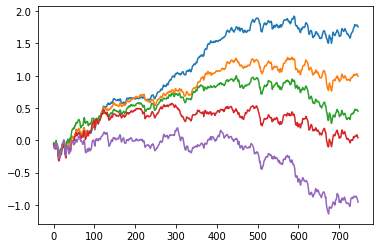

In [32]:
plt.plot(np.cumsum(rtnArr[:,1:],axis=0));

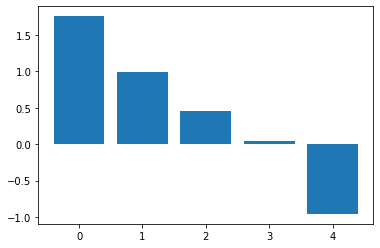

In [33]:
plt.bar(np.arange(rtnArr.shape[1]-1),np.sum(rtnArr[:,1:],axis=0));

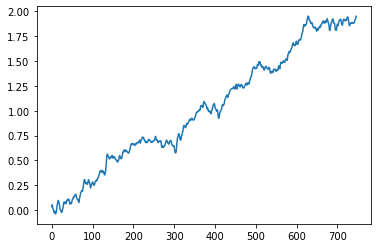

In [34]:
plt.plot(np.cumsum(rtnArr[:,2] - rtnArr[:,-1],axis=0));